In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

In [2]:
df = pd.read_csv("../Data/final_dataset.csv")
df.head()

,CountryCode,CountryName,TourismEmploymentPer1000,FoodEmploymentPer1000,TourismGDPPercentage,BusinessToPersonalRatio,AverageStayDays,InboundArrivalsPer1000,DomesticTouristsPer1000,InboundToOutboundRatio,...,PollutionIndex,QualityOfLifeIndex,ClimateIndex,TrafficIndex,TrafficTimeIndexMinutes,TrafficInefficiencyIndex,ReverseTrafficInefficiencyIndex,ReverseTrafficTimeIndexMinutes,ReverseTrafficIndex,ReversePollutionIndex
0,ALB,Albania,15.608840,NaN,NaN,0.021680,2.562741,1793.802738,NaN,NaN,...,77.0,104.3,86.4,114.7,36.7,105.7,341.6,28.6,220.2,16.7
1,DZA,Algeria,7.411779,NaN,1.129921,1.764563,1.621484,NaN,NaN,NaN,...,63.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8
2,AGO,Angola,2.439200,0.710283,NaN,0.111823,4.000000,2.001969,NaN,6.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,Argentina,28.270541,11.444930,1.890788,0.140625,2.552286,16.460292,645.361734,0.420933,...,50.8,118.0,98.3,175.4,43.8,190.9,256.4,21.5,159.5,42.9
4,AUS,Australia,21.464763,7.825559,1.572674,0.280377,2.216665,247.324185,3157.386095,NaN,...,26.8,192.2,93.8,163.0,37.4,237.8,209.5,27.9,171.9,66.9


In [3]:
# Select relevant columns and drop rows with NaN values in either column
subset = df[['CountryName', 'SafetyIndex', 'HealthCareIndex']].dropna()
print(subset.shape[0])

66


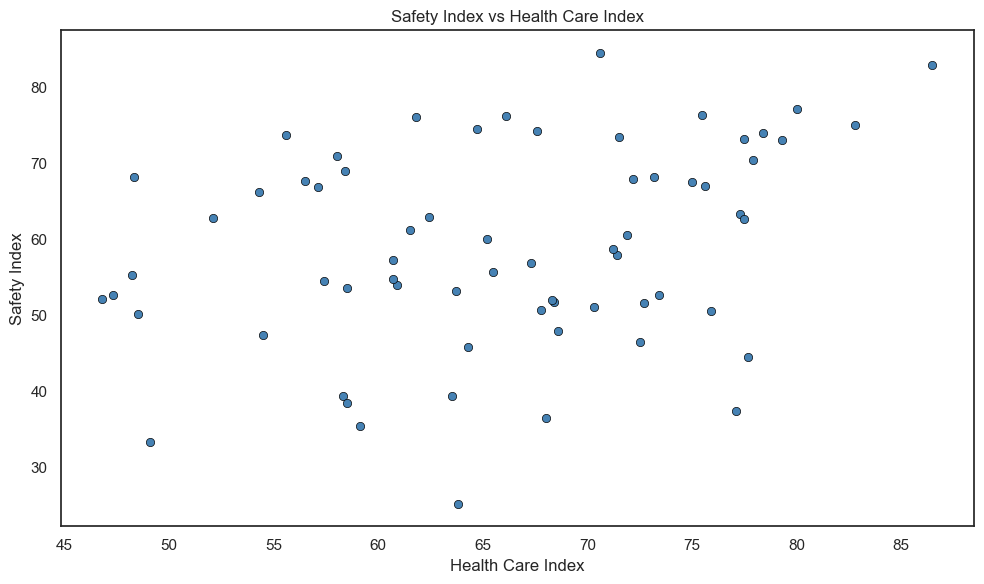

In [4]:
# Scatter plot
# Set seaborn theme with white background
sns.set_theme(style="white")

# Create a clearer scatter plot with uniform dot color
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=subset,
    x='HealthCareIndex',
    y='SafetyIndex',
    color='steelblue',
    edgecolor='black'
)
plt.title('Safety Index vs Health Care Index')
plt.xlabel('Health Care Index')
plt.ylabel('Safety Index')
plt.tight_layout()
plt.show()

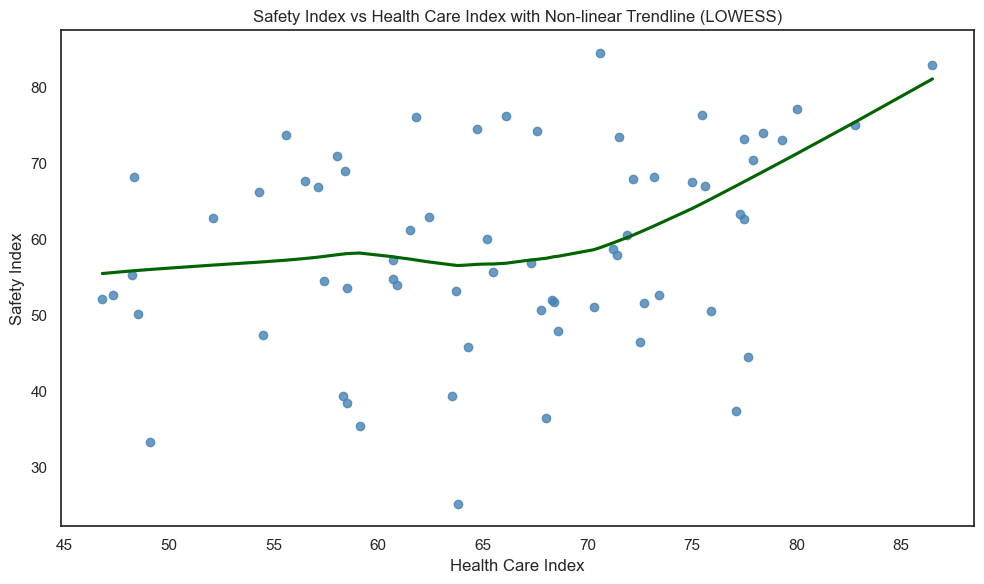

In [5]:
# Plot with non-linear trendline using lowess smoothing
plt.figure(figsize=(10, 6))
sns.set_theme(style="white")
nonlinear_plot = sns.regplot(
    data=subset,
    x='HealthCareIndex',
    y='SafetyIndex',
    scatter_kws={'color': 'steelblue'},
    line_kws={'color': 'darkgreen'},
    lowess=True
)
plt.title('Safety Index vs Health Care Index with Non-linear Trendline (LOWESS)')
plt.xlabel('Health Care Index')
plt.ylabel('Safety Index')
plt.tight_layout()
plt.show()


In [16]:
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = spearmanr(subset['HealthCareIndex'], subset['SafetyIndex'])

# Round values
rounded_corr = round(corr_coef, 2)
rounded_p = round(p_value, 4)

# Interpret correlation strength with buffer ranges
if abs(rounded_corr) < 0.28:
    strength = "weak"
elif abs(rounded_corr) < 0.33:
    strength = "borderline weak-to-moderate"
elif abs(rounded_corr) < 0.57:
    strength = "moderate"
elif abs(rounded_corr) < 0.63:
    strength = "borderline moderate-to-strong"
else:
    strength = "strong"

# Interpret significance
if rounded_p < 0.05:
    significance = "statistically significant"
else:
    significance = "not statistically significant"

# Output
print(f"Pearson Correlation Coefficient: {rounded_corr}")
print(f"→ This indicates a {strength} positive correlation between Health Care Index and Safety Index.")

print(f"\nP-value: {rounded_p}")
print(f"→ Since it's {'below' if rounded_p < 0.05 else 'above'} 0.05, this correlation is {significance}.")

Pearson Correlation Coefficient: 0.28
→ This indicates a borderline weak-to-moderate positive correlation between Health Care Index and Safety Index.

P-value: 0.0248
→ Since it's below 0.05, this correlation is statistically significant.


In [10]:
# Rank the data
ranked_data = subset[['CountryName', 'HealthCareIndex', 'SafetyIndex']].copy()
ranked_data['HealthCareRank'] = ranked_data['HealthCareIndex'].rank(ascending=False)
ranked_data['SafetyRank'] = ranked_data['SafetyIndex'].rank(ascending=False)
ranked_data['RankDifference'] = abs(ranked_data['HealthCareRank'] - ranked_data['SafetyRank'])

# Sort by difference for clarity in plotting
ranked_data_sorted = ranked_data.sort_values(by='RankDifference', ascending=False)

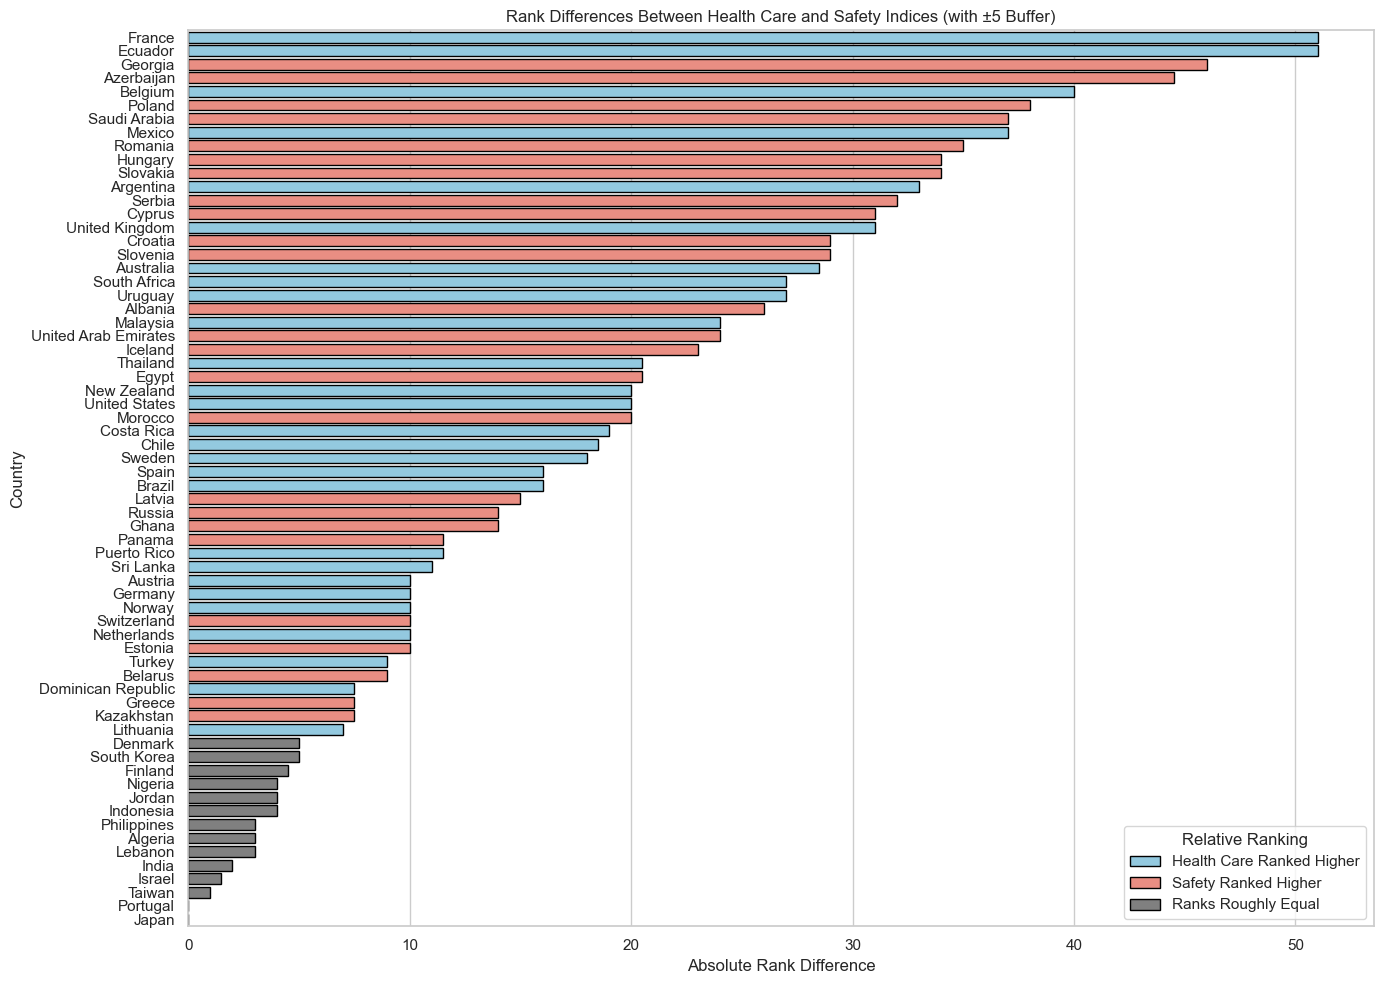

In [11]:
# Recalculate "Same Rank" using a buffer of ±5
ranked_data['HigherRankingBuffered'] = np.where(
    abs(ranked_data['HealthCareRank'] - ranked_data['SafetyRank']) <= 5,
    'Ranks Roughly Equal',
    np.where(
        ranked_data['HealthCareRank'] < ranked_data['SafetyRank'],
        'Health Care Ranked Higher',
        'Safety Ranked Higher'
    )
)

# Sort for plotting
ranked_data_sorted = ranked_data.sort_values(by='RankDifference', ascending=False)

# Plot with buffered interpretation of rank similarity
plt.figure(figsize=(14, 10))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(
    data=ranked_data_sorted,
    x='RankDifference',
    y='CountryName',
    hue='HigherRankingBuffered',
    dodge=False,
    palette={
        'Health Care Ranked Higher': 'skyblue',
        'Safety Ranked Higher': 'salmon',
        'Ranks Roughly Equal': 'gray'
    },
    edgecolor='black'
)
plt.title('Rank Differences Between Health Care and Safety Indices (with ±5 Buffer)')
plt.xlabel('Absolute Rank Difference')
plt.ylabel('Country')
plt.legend(title='Relative Ranking')
plt.tight_layout()
plt.show()



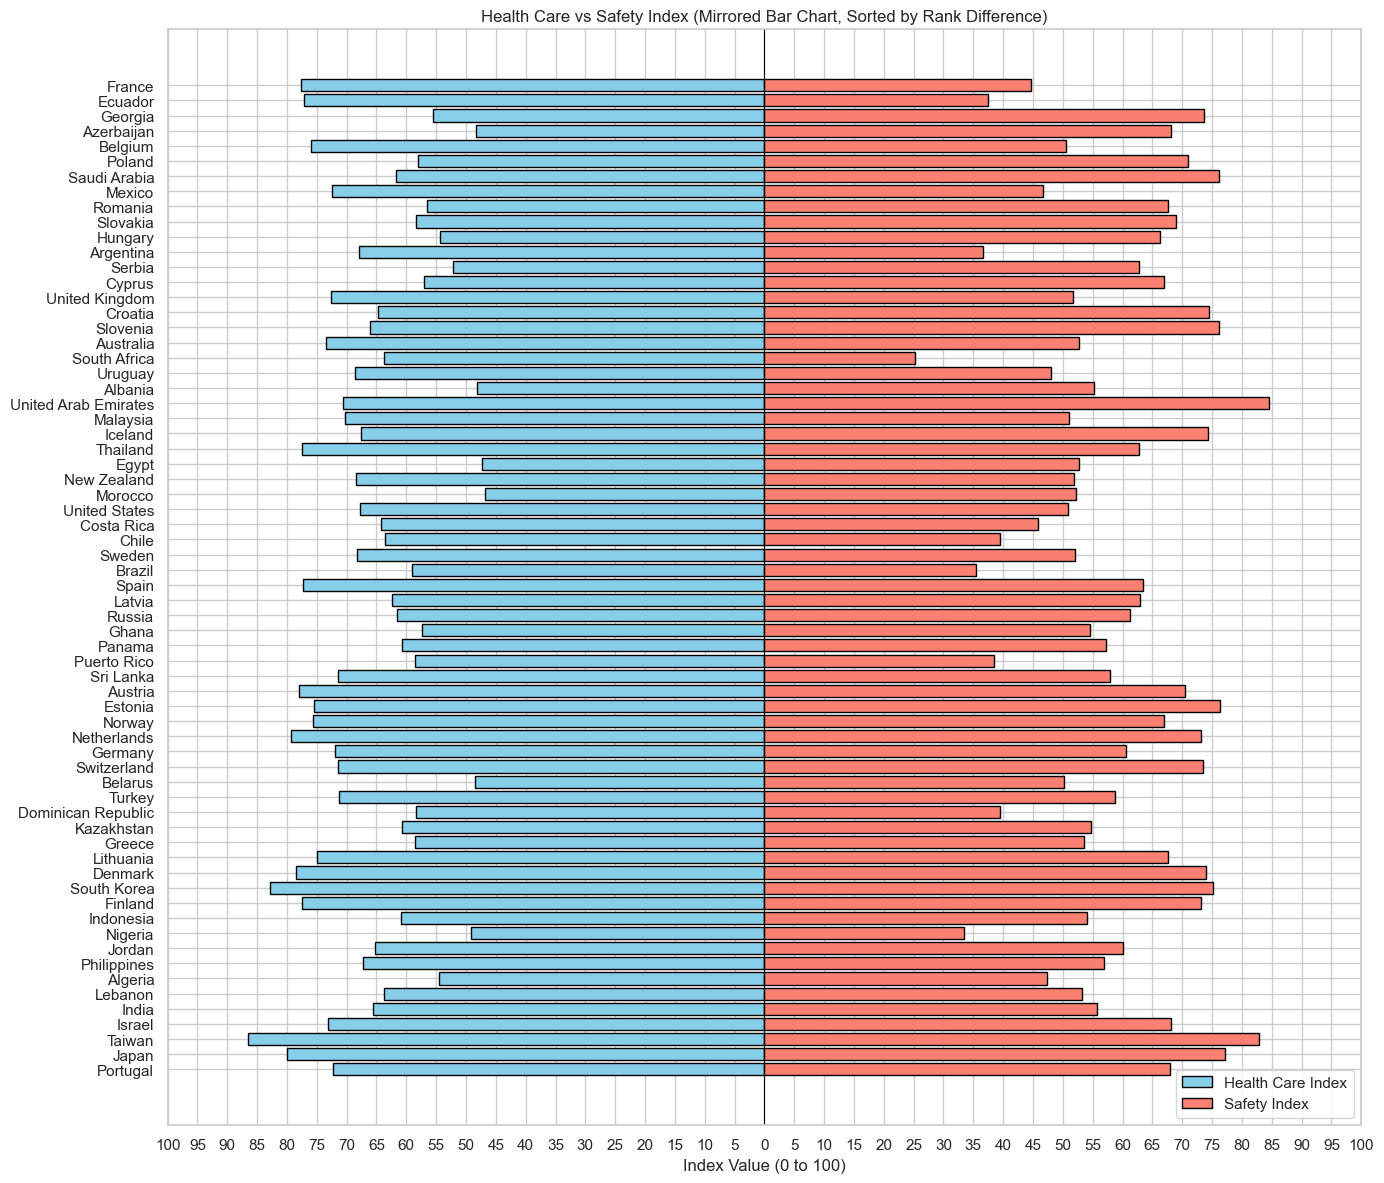

In [12]:
# Sort by the original absolute rank difference (as in the rank difference chart)
ranked_data_sorted = ranked_data.sort_values(by='RankDifference', ascending=True)

# Plot mirrored bar chart using raw index values (no normalization)
plt.figure(figsize=(14, 12))
sns.set_theme(style="whitegrid")

# Left bars (Health Care Index) as negative
plt.barh(
    ranked_data_sorted['CountryName'],
    -ranked_data_sorted['HealthCareIndex'],
    color='skyblue',
    edgecolor='black',
    label='Health Care Index'
)

# Right bars (Safety Index)
plt.barh(
    ranked_data_sorted['CountryName'],
    ranked_data_sorted['SafetyIndex'],
    color='salmon',
    edgecolor='black',
    label='Safety Index'
)

# Update tick labels to show as positive, even on the negative side
xrange =range(-100, 101, 5)
plt.xticks(
    ticks=xrange,
    labels=[str(abs(x)) for x in xrange]
)


plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('Index Value (0 to 100)')
plt.title('Health Care vs Safety Index (Mirrored Bar Chart, Sorted by Rank Difference)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
